<a href="https://colab.research.google.com/github/Sonchecho/DataScience300/blob/main/Taller_de_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Taller de Regresion Lineal

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import random 
from sklearn import datasets


1. Función para encontrar los valores optimos de los parámetros


In [ ]:
def LinearRegressionTrain(x,y,epochs,learning_rate):
  a = learning_rate
  sample, instances  = np.shape(x)
  print(sample)
  w_list = []
  w = np.zeros((instances+1,1))
  w_list.append(w)
  n = 1
  error_energy = []
  for epoch in range(epochs):
    E = 0 
    for data in range(sample):
      x_aux = np.append(x[data,:],1)
      x_aux = np.reshape(x_aux,(instances+1,1))
      y_pred = np.sign(np.dot(w.T,x_aux))
      e = int(y[data]-y_pred)
      w = w + a*(e)*x_aux
      E = E + e**2
    error_energy.append(float(1/2*E))
    w_list.append(w)
  return w, error_energy, w_list

def LinearRegressionPredict(x_line,w):
    y_pred = [float(1/w[1]*(-w[2] -w[0]*x)) for x in x_line]
    return y_pred 



# **Data set aleaotorio**

1. Se escoge el conjunto de datos de manera aleatorio y se escogen un criterio aleatorio para realizar la clasificación del conjunto de datos. Ademásd de esto se muestra la gráfica de dichos puntos

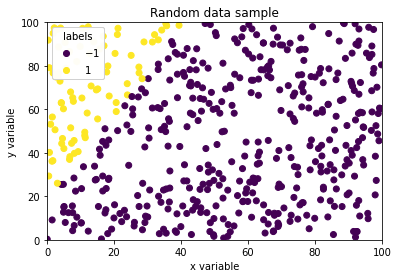

In [ ]:
np.random.seed(700)
random_data = np.random.random((500,2))*100
m = np.random.randint(0,10)
b = np.random.randint(-100,20) 
random_label = [1 if y > m*x + b else -1 for x,y in zip(random_data[:,0],random_data[:,1])]
fig, ax = plt.subplots()
scatter = ax.scatter(random_data[:,0],random_data[:,1],c = random_label)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="labels")
ax.add_artist(legend1)
plt.xlabel('x variable')
plt.ylabel('y variable')
plt.title('Random data sample')
plt.xlim([0,100])
plt.ylim([0,100])
plt.show()

2. La linea de tendencia que se postula es la del criterio que se utilizo para realizar la clasificación aleatoria de los puntos es decir y se muestra en la sigueinte grafica

La linea es de la forma : y = 2x + (17)


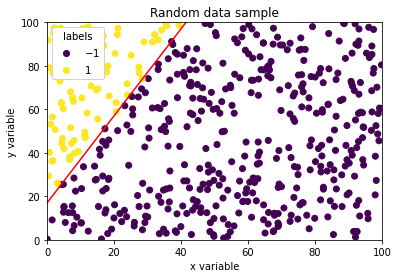

In [ ]:
print('La linea es de la forma : y = ' + str(round(m,3)) + 'x' + ' + (' +str(round(b,3)) + ')')
x_line = np.arange(0,100)
y_line = [m*x + b for x in x_line]
fig, ax = plt.subplots()
scatter = ax.scatter(random_data[:,0],random_data[:,1],c = random_label)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="labels")
ax.add_artist(legend1)
plt.plot(x_line,y_line,'r')
plt.xlabel('x variable')
plt.ylabel('y variable')
plt.title('Random data sample')
plt.xlim([0,100])
plt.ylim([0,100])
plt.show()

3. Ahora se utilizan 3 diferentes épocas con 3 diferentes tasas de aprendizaje, ademas de esto se grafica la recta obtenida en cada una de las combinación (son 9 en total). Com elemento extra se gráfica la curva de aprendizaje que se definió como la suma de los errores al cuadrado dividido entre 2 y ese error se muestra época a época para ver la convergencia del algoritmo.

500
Random data sample: rate 0.1 y epochs 100


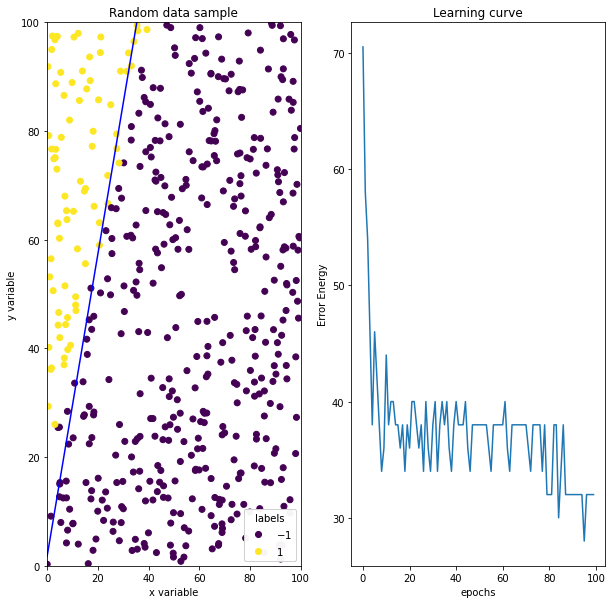

500
Random data sample: rate 0.5 y epochs 100


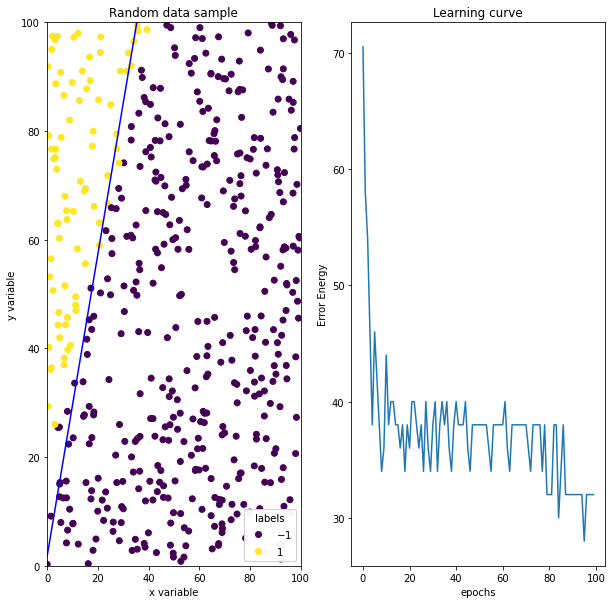

500
Random data sample: rate 1 y epochs 100


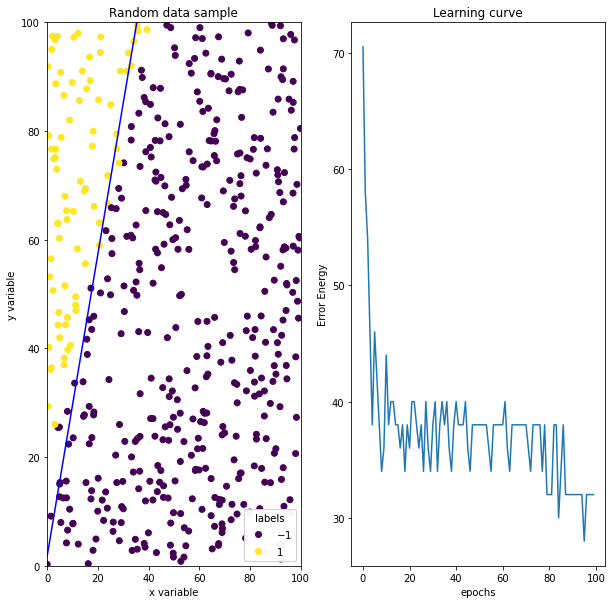

500
Random data sample: rate 0.1 y epochs 1000


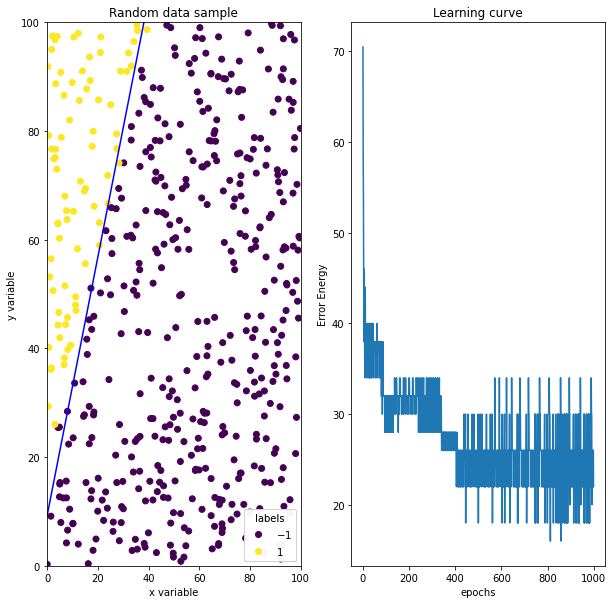

500
Random data sample: rate 0.5 y epochs 1000


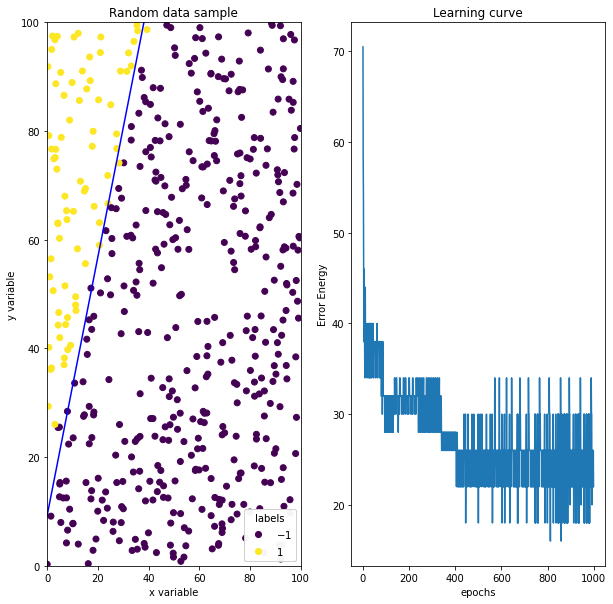

500
Random data sample: rate 1 y epochs 1000


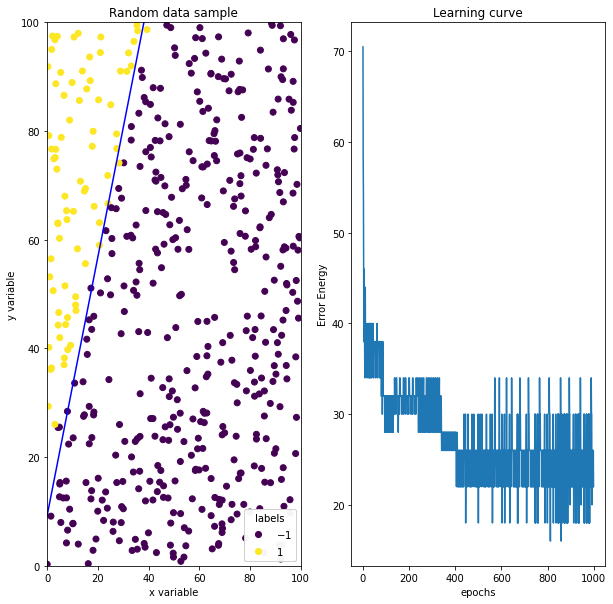

500
Random data sample: rate 0.1 y epochs 5000


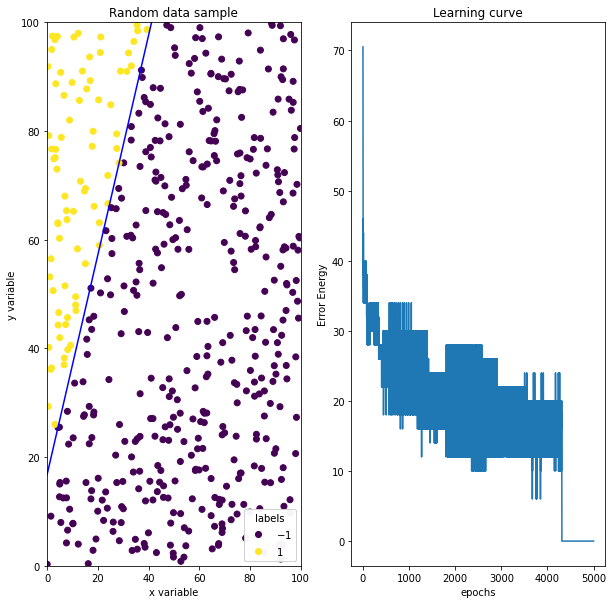

500
Random data sample: rate 0.5 y epochs 5000


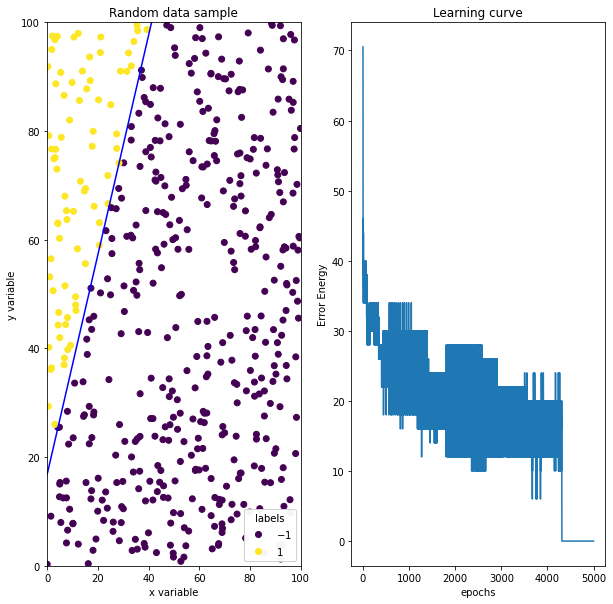

500
Random data sample: rate 1 y epochs 5000


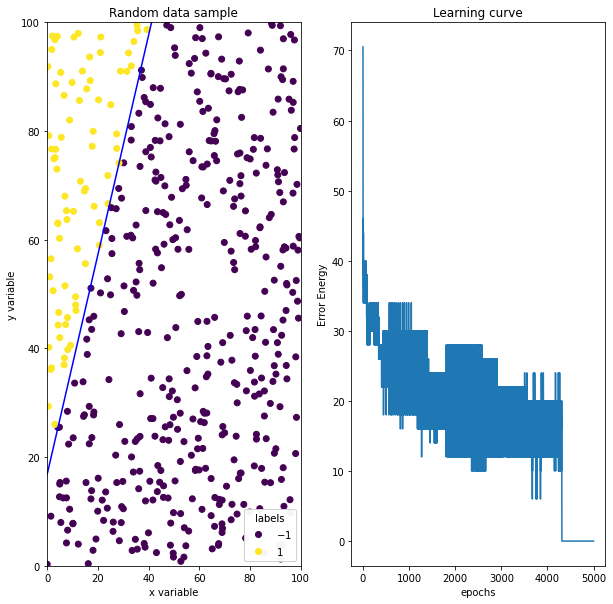

In [ ]:
list_epochs = [100,1000,5000]
learning_rate = [0.1, 0.5, 1]
for epochs in list_epochs:
  for rate in learning_rate:
    w, error_energy, _ = LinearRegressionTrain(random_data,random_label,epochs,rate)
    y_pred = LinearRegressionPredict(x_line,w)

    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,10))
    scatter = ax1.scatter(random_data[:,0],random_data[:,1],c = random_label)
    name = 'Random data sample: rate {} y epochs {}'.format(rate,epochs)
    print(name)
    legend1 = ax1.legend(*scatter.legend_elements(),
                    loc="lower right", title="labels")
    ax1.add_artist(legend1)
    ax1.plot(x_line,y_pred,'b')
    ax1.set_title('Random data sample')
    ax1.set_xlabel('x variable')
    ax1.set_ylabel('y variable')
    ax1.set_xlim([0,100])
    ax1.set_ylim([0,100])

    ax2.plot(np.arange(0,epochs,1),error_energy)
    ax2.set_title('Learning curve')
    ax2.set_xlabel('epochs')
    ax2.set_ylabel('Error Energy')
    plt.show()



    



4. Del ejercicio anterior se tiene que el mejor número de epocas para este conjunto de datos es 5000 epocas y la mejor tasa de aprendizaje es 1. A continación se escogen 10 lineas de tendencia , cada 500 epocas, y se grafica para ver la evolución de la linea en los datos. Ademas de esto tambien mostramos la evolución de la pendiente y del intercepto a medida que pasa cada época



500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


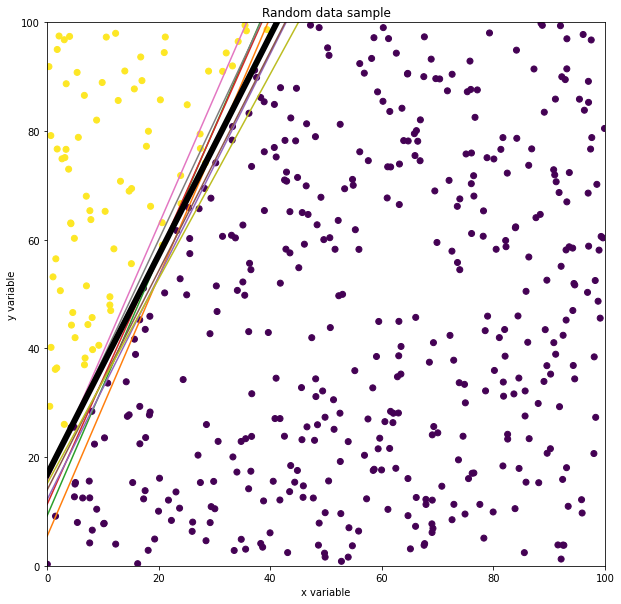

In [ ]:
epochs = 5000 
rate = 1

w_final, error_energy, w_list = LinearRegressionTrain(random_data,random_label,epochs,rate)

curves = np.arange(0,5500,500)

fig, ax1 = plt.subplots(figsize = (10,10))
scatter = ax1.scatter(random_data[:,0],random_data[:,1],c = random_label)
ax1.set_title('Random data sample')
ax1.set_xlabel('x variable')
ax1.set_ylabel('y variable')
ax1.set_xlim([0,100])
ax1.set_ylim([0,100])

for w in curves:     
  y_pred = LinearRegressionPredict(x_line,w_list[w])
  if w == 5000:
    ax1.plot(x_line,y_pred,'k',linewidth=6.0)
  else:
    ax1.plot(x_line,y_pred)


plt.show()





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


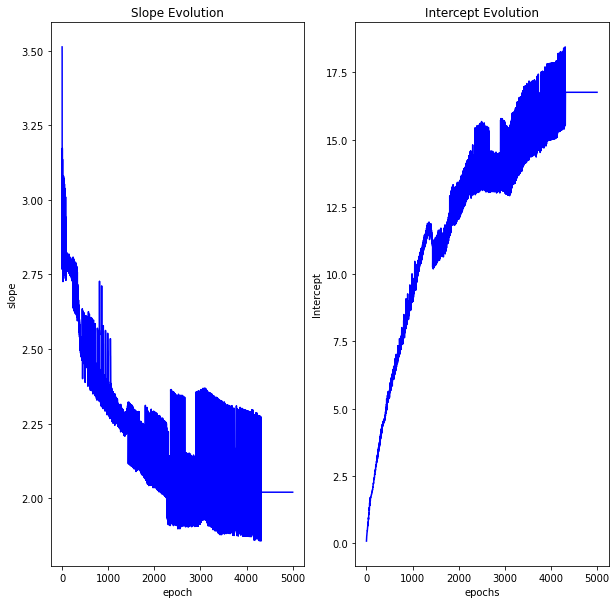

La linea es de la forma : y = 2.02x + (16.763)


In [ ]:
from numpy.lib.function_base import append
slope_evolution = []
intercept_evolution = []
  
for w in w_list:  
  slope = -w[0]/w[1]
  intercept = -w[2]/(w[1])
  slope_evolution.append(slope)
  intercept_evolution.append(intercept)


fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,10))
ax1.plot(slope_evolution,'b')
ax1.set_title('Slope Evolution')
ax1.set_xlabel('epoch')
ax1.set_ylabel('slope')


ax2.plot(intercept_evolution,'b')
ax2.set_title('Intercept Evolution')
ax2.set_xlabel('epochs')
ax2.set_ylabel('Intercept')
plt.show()

m = float(-w_final[0]/w_final[1])
b = float(-w_final[2]/(w_final[1]))
print('La linea es de la forma : y = ' + str(round(m,3)) + 'x' + ' + (' +str(round(b,3)) + ')')


5. Por ultimo se tiene que el algortimo requiere bastantes epocas para su convergencia , esto lo podemos ver en la linea de aprendizaje y tambien en la grafica de la pendiente y el intercepto. Sin embargo se puede ver que en las graficas que apartir de la época 4000 la energía de error llega a cero y ademas el intercepto y la pendiente tambien en esa epoca convergen a sus valores deseados. Por lo tanto el número óptimo de epocas será 4000 y nos quedamos con la tasa de aprendizaje igual a 1 

# Data set Iris

1. Se importa el conjunto de datos y se realiza una modificación al conjunto de datos y se dejan solamente dos etiquetas (dos tipos de flores) además de esto solo se  escojen 2 variables para poder realizar la visualización de los datos en dos dimensiones. 

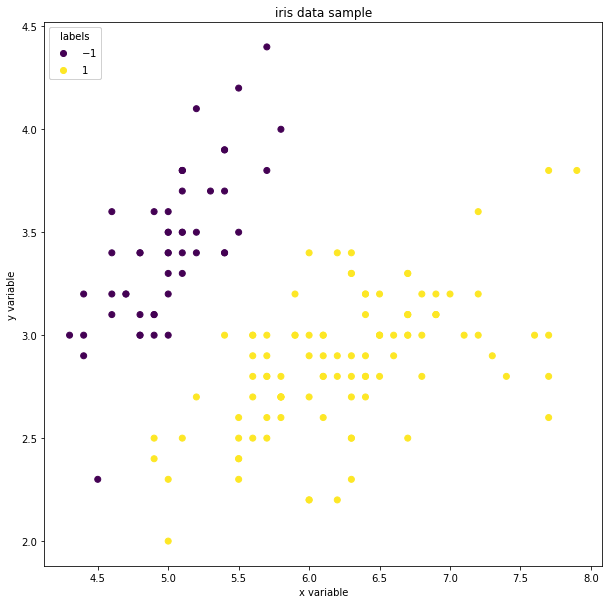

In [ ]:
iris_data = datasets.load_iris()
iris_sample = iris_data.data[:,:2]
iris_label_sample = iris_data.target
iris_label_sample = [-1 if x == 0 else 1 for x in iris_label_sample]

fig, ax = plt.subplots(figsize = (10,10))
scatter = ax.scatter(iris_sample[:,0],iris_sample[:,1],c = iris_label_sample)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="labels")
ax.add_artist(legend1)
plt.xlabel('x variable')
plt.ylabel('y variable')
plt.title('iris data sample')
plt.show()

 2. La linea de tendia se postula de manera aproximada congiendo el punto (4.5,2.5) y el punto (6.0,3.5) y se encuentra la pendiente y la ecuación de la recta de la siguiente manera y se ajusta el intercepto para ajustarla como linea separadora de las dos clases

La linea es de la forma : y = 0.692x + (-0.6)


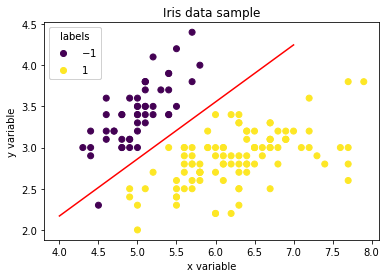

In [ ]:
m = (4.5 -0)/(6.5-0)
b = -0.6
print('La linea es de la forma : y = ' + str(round(m,3)) + 'x' + ' + (' +str(round(b,3)) + ')')
x_line = np.arange(4,8)
y_line = [m*x + b for x in x_line]
fig, ax = plt.subplots()
scatter = ax.scatter(iris_sample[:,0],iris_sample[:,1],c = iris_label_sample)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="labels")
ax.add_artist(legend1)
plt.plot(x_line,y_line,'r')
plt.xlabel('x variable')
plt.ylabel('y variable')
plt.title('Iris data sample')
plt.show()

3. Ahora se utilizan 3 diferentes épocas con 3 diferentes tasas de aprendizaje, ademas de esto se grafica la recta obtenida en cada una de las combinación (son 9 en total). Com elemento extra se gráfica la curva de aprendizaje que se definió como la suma de los errores al cuadrado dividido entre 2 y ese error se muestra época a época para ver la convergencia del algoritmo.

150
Iris data sample: rate 0.1 y epochs 50


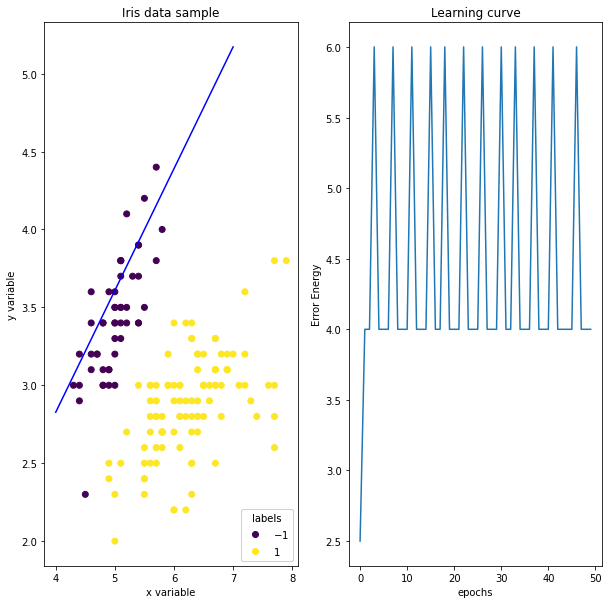

150
Iris data sample: rate 0.5 y epochs 50


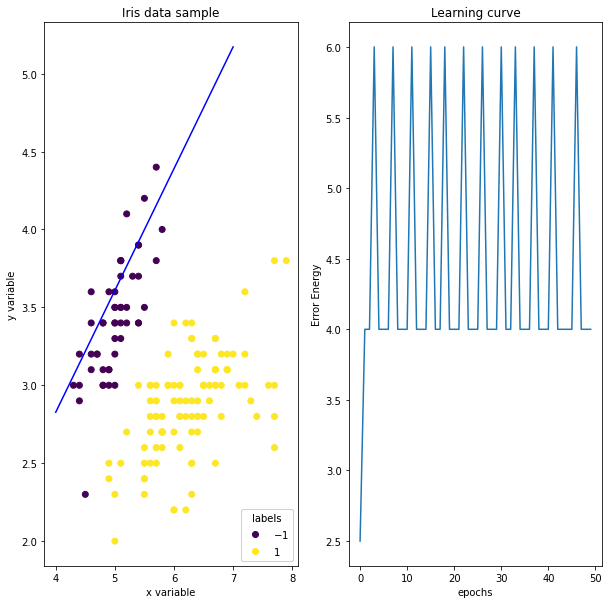

150
Iris data sample: rate 1 y epochs 50


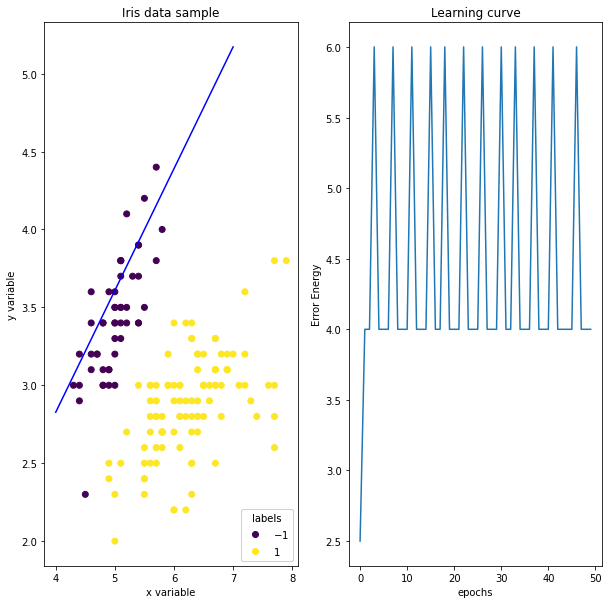

150
Iris data sample: rate 0.1 y epochs 100


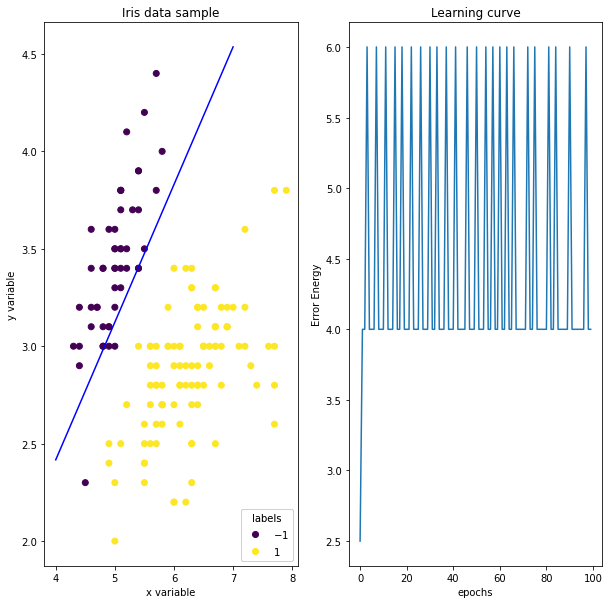

150
Iris data sample: rate 0.5 y epochs 100


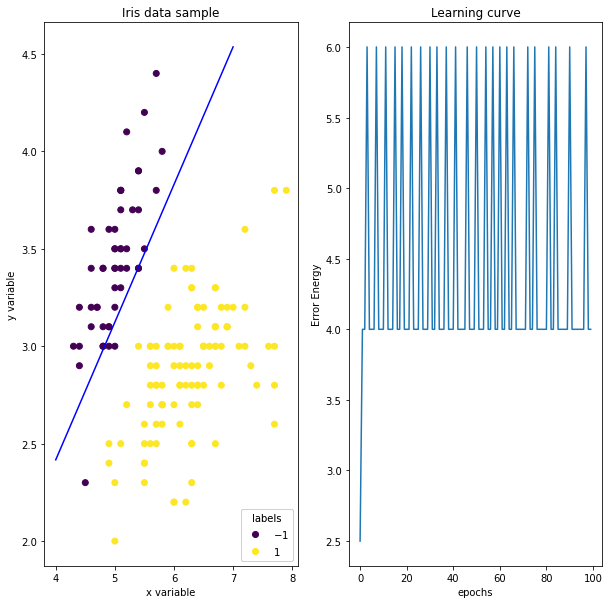

150
Iris data sample: rate 1 y epochs 100


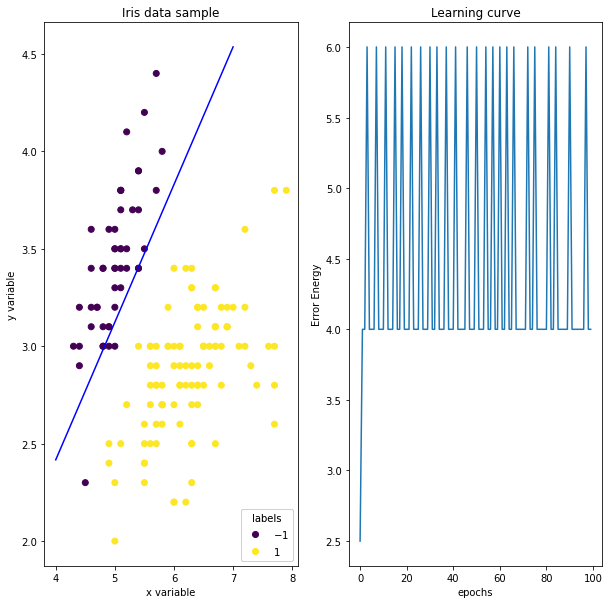

150
Iris data sample: rate 0.1 y epochs 800


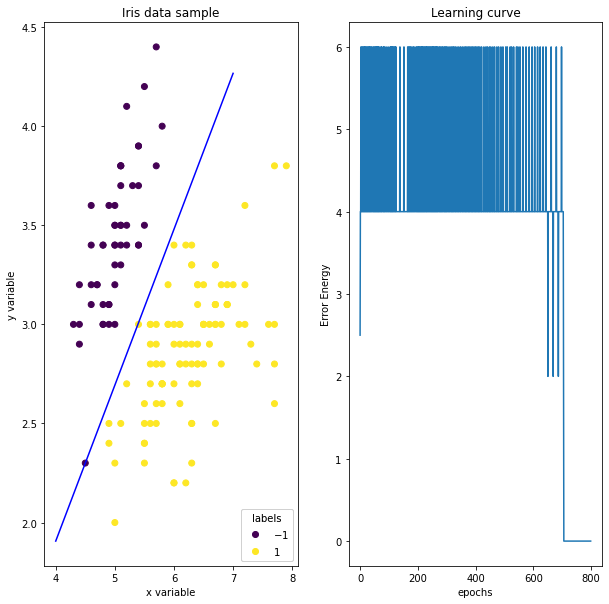

150
Iris data sample: rate 0.5 y epochs 800


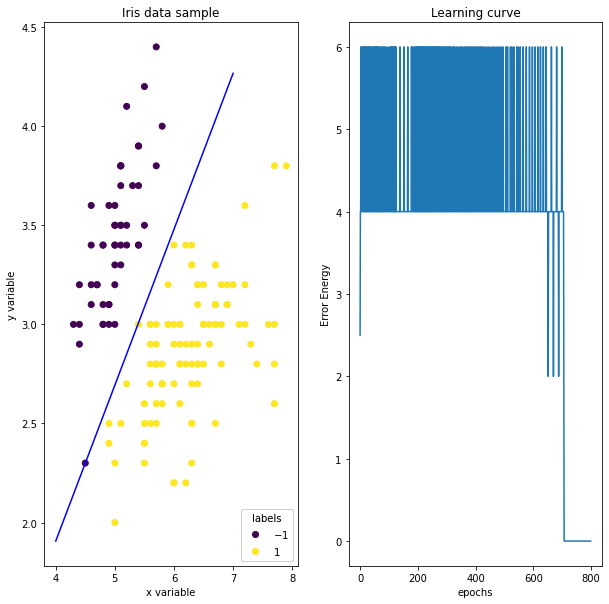

150
Iris data sample: rate 1 y epochs 800


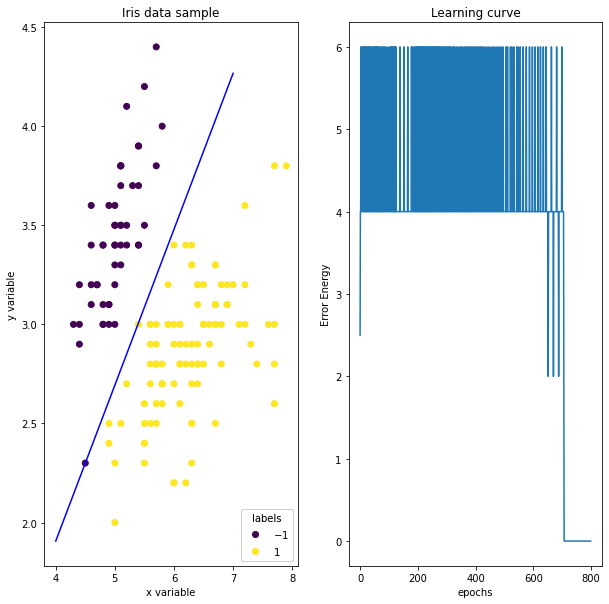

In [ ]:
list_epochs = [50,100,800]
learning_rate = [0.1, 0.5, 1]
for epochs in list_epochs:
  for rate in learning_rate:
    w, error_energy, _ = LinearRegressionTrain(iris_sample,iris_label_sample,epochs,rate)
    y_pred = LinearRegressionPredict(x_line,w)

    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,10))
    scatter = ax1.scatter(iris_sample[:,0],iris_sample[:,1],c = iris_label_sample)
    name = 'Iris data sample: rate {} y epochs {}'.format(rate,epochs)
    print(name)
    legend1 = ax1.legend(*scatter.legend_elements(),
                    loc="lower right", title="labels")
    ax1.add_artist(legend1)
    ax1.plot(x_line,y_pred,'b')
    ax1.set_title('Iris data sample')
    ax1.set_xlabel('x variable')
    ax1.set_ylabel('y variable')
    

    ax2.plot(np.arange(0,epochs,1),error_energy)
    ax2.set_title('Learning curve')
    ax2.set_xlabel('epochs')
    ax2.set_ylabel('Error Energy')
    plt.show()

4. Del ejercicio anterior se tiene que el mejor número de epocas para este conjunto de datos es aproxiamdamete 750 epocas y la mejor tasa de aprendizaje es 1. A continación se escogen 10 lineas de tendencia , cada 100 epocas, y se grafica para ver la evolución de la linea en los datos. Ademas de esto tambien mostramos la evolución de la pendiente y del intercepto a medida que pasa cada época

150


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


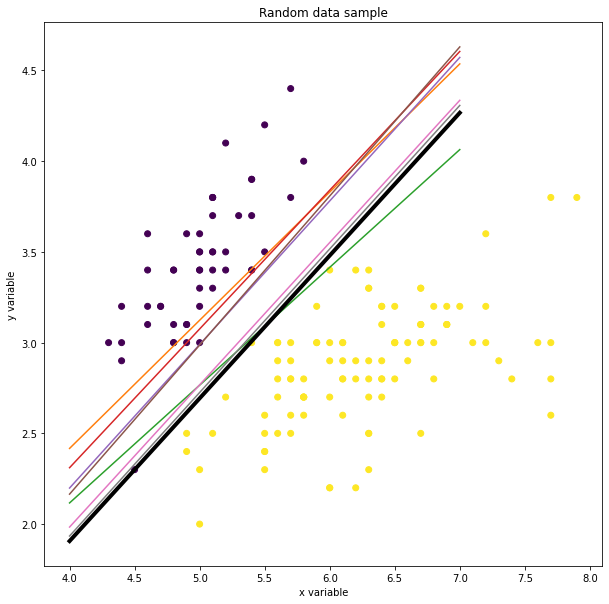

In [ ]:
epochs = 800 
rate = 1

w_final, error_energy, w_list = LinearRegressionTrain(iris_sample,iris_label_sample,epochs,rate)

curves = np.arange(0,850,100)

fig, ax1 = plt.subplots(figsize = (10,10))
scatter = ax1.scatter(iris_sample[:,0],iris_sample[:,1],c = iris_label_sample)
ax1.set_title('Random data sample')
ax1.set_xlabel('x variable')
ax1.set_ylabel('y variable')


for w in curves:     
  y_pred = LinearRegressionPredict(x_line,w_list[w])
  if w == 800:
    ax1.plot(x_line,y_pred,'k',linewidth=4.0)
  else:
    ax1.plot(x_line,y_pred)


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


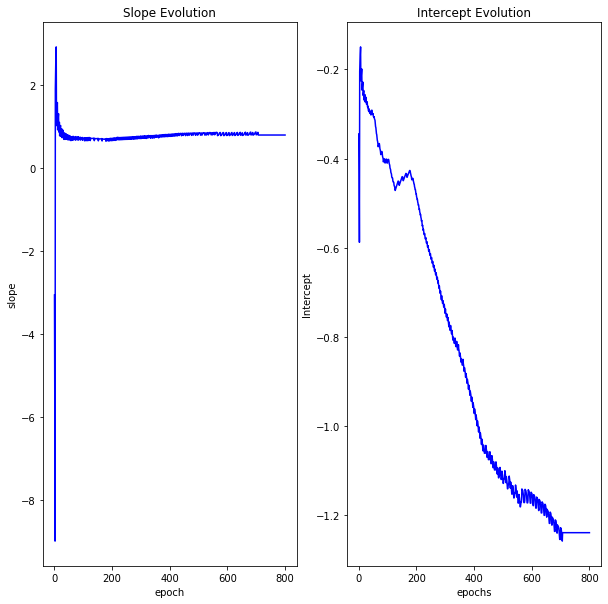

La linea es de la forma : y = 0.787x + (-1.241)


In [ ]:
slope_evolution = []
intercept_evolution = []
  
for w in w_list:  
  slope = -w[0]/w[1]
  intercept = -w[2]/(w[1])
  slope_evolution.append(slope)
  intercept_evolution.append(intercept)


fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,10))
ax1.plot(slope_evolution,'b')
ax1.set_title('Slope Evolution')
ax1.set_xlabel('epoch')
ax1.set_ylabel('slope')


ax2.plot(intercept_evolution,'b')
ax2.set_title('Intercept Evolution')
ax2.set_xlabel('epochs')
ax2.set_ylabel('Intercept')
plt.show()

m = float(-w_final[0]/w_final[1])
b = float(-w_final[2]/(w_final[1]))
print('La linea es de la forma : y = ' + str(round(m,3)) + 'x' + ' + (' +str(round(b,3)) + ')')


5. Por ultimo se tiene que el algortimo requiere bastantes epocas para su convergencia , esto lo podemos ver en la linea de aprendizaje y tambien en la grafica de la pendiente y el intercepto. Sin embargo se puede ver que en las graficas que apartir de la época 750 la energía de error llega a cero y ademas el intercepto y la pendiente tambien en esa epoca convergen a sus valores deseados. Por lo tanto el número óptimo de epocas será **700** y nos quedamos con la tasa de aprendizaje igual a 1 

# **Data set Online**

1. Se importa el conjunto de datos 'Load and return the breast cancer wisconsin dataset (classification)' [Conjunto de datos](https://www.kite.com/python/docs/sklearn.datasets.load_breast_cancer). El cual se puede exportar des de la libreria de Python



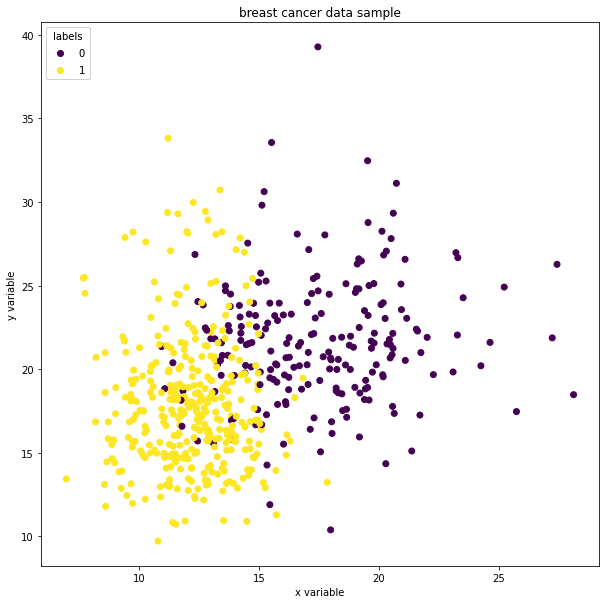

In [ ]:
breast_cancer = datasets.load_breast_cancer()
breast_cancer_sample = breast_cancer.data[:,:2]
breast_cancer_label_sample = breast_cancer.target

fig, ax = plt.subplots(figsize = (10,10))
scatter = ax.scatter(breast_cancer_sample[:,0],breast_cancer_sample[:,1], c = breast_cancer_label_sample)
legend1 = ax.legend(*scatter.legend_elements(),
                   loc="upper left", title="labels")
ax.add_artist(legend1)
plt.xlabel('x variable')
plt.ylabel('y variable')
plt.title('breast cancer data sample')
plt.show()

 2. La linea de tendencia se postula de manera aproximada congiendo el punto (0,30) y el punto (20,0) y se encuentra la pendiente y la ecuación de la recta de la siguiente manera y se ajusta el intercepto para ajustarla como linea separadora de las dos clases




La linea es de la forma : y = -1.5x + (45)


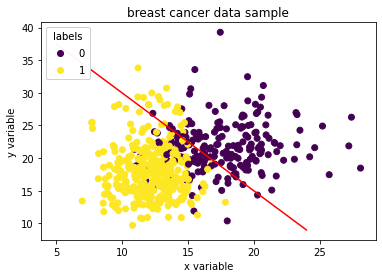

In [ ]:
m = (0 -30)/(20-0)
b = -m*0+30
b = 45
print('La linea es de la forma : y = ' + str(round(m,3)) + 'x' + ' + (' +str(round(b,3)) + ')')
x_line = np.arange(5,25)
y_line = [m*x + b for x in x_line]
fig, ax = plt.subplots()
scatter = ax.scatter(breast_cancer_sample[:,0],breast_cancer_sample[:,1],c = breast_cancer_label_sample)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="labels")
ax.add_artist(legend1)
plt.plot(x_line,y_line,'r')
plt.xlabel('x variable')
plt.ylabel('y variable')
plt.title('breast cancer data sample')
plt.show()

3. Ahora se utilizan 3 diferentes épocas con 3 diferentes tasas de aprendizaje, ademas de esto se grafica la recta obtenida en cada una de las combinación (son 9 en total). Com elemento extra se gráfica la curva de aprendizaje que se definió como la suma de los errores al cuadrado dividido entre 2 y ese error se muestra época a época para ver la convergencia del algoritmo.

569
breast_cancer_sample sample: rate 0.1 y epochs 800


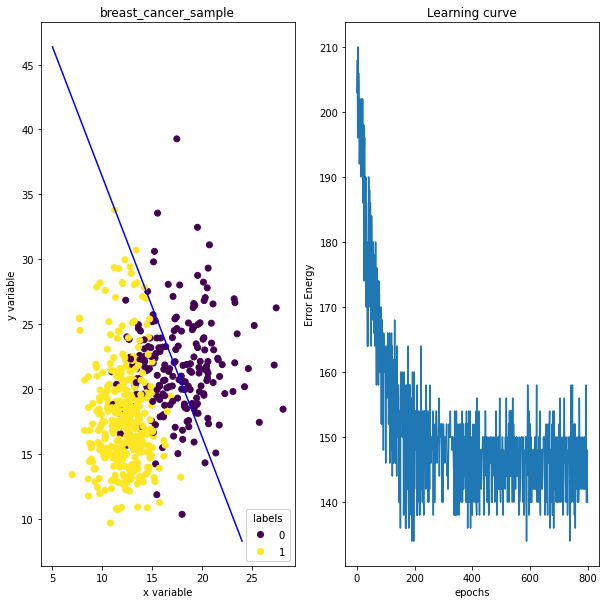

569
breast_cancer_sample sample: rate 0.5 y epochs 800


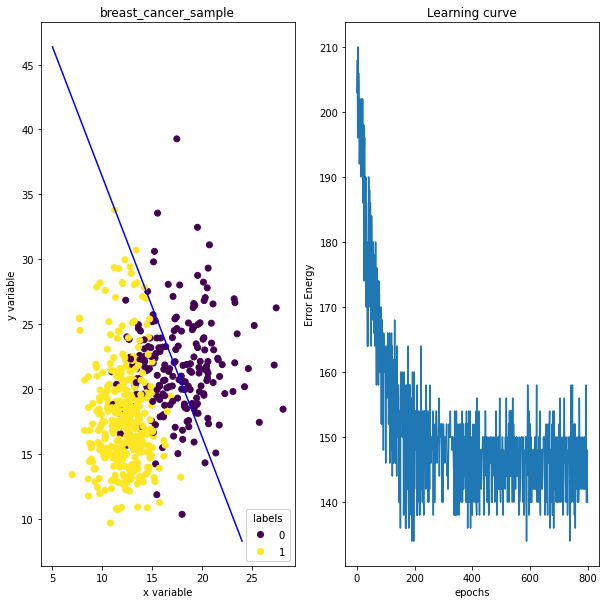

569
breast_cancer_sample sample: rate 1 y epochs 800


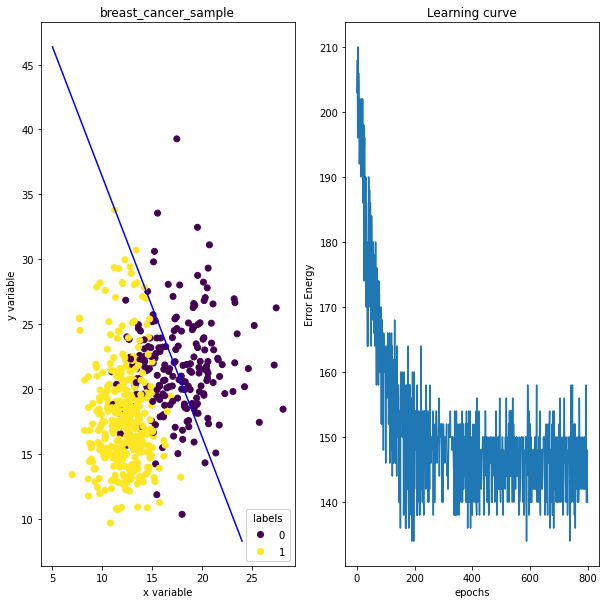

569
breast_cancer_sample sample: rate 0.1 y epochs 2000


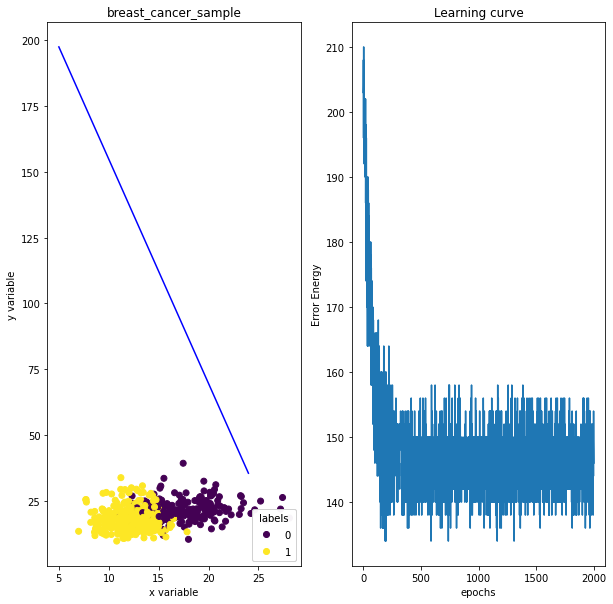

569
breast_cancer_sample sample: rate 0.5 y epochs 2000


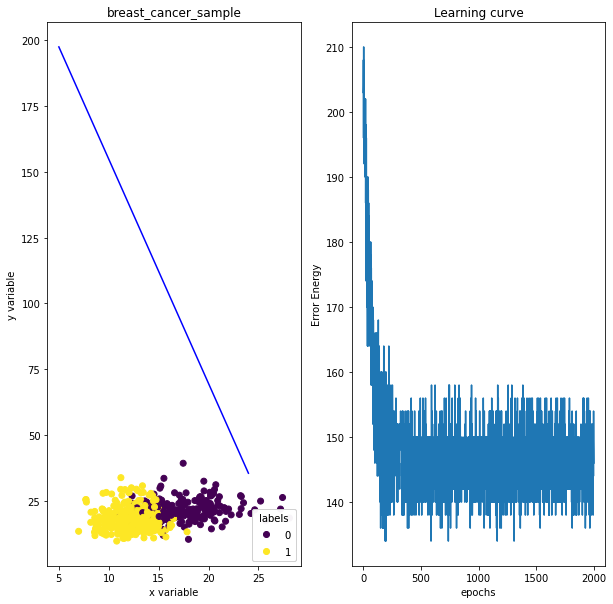

569
breast_cancer_sample sample: rate 1 y epochs 2000


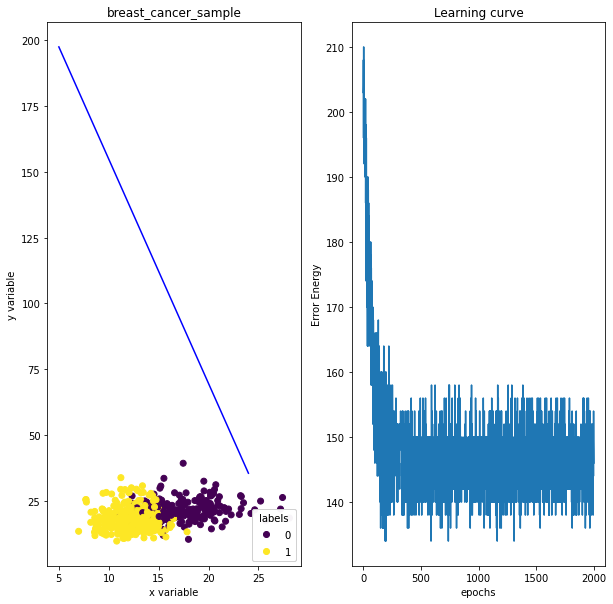

569
breast_cancer_sample sample: rate 0.1 y epochs 5000


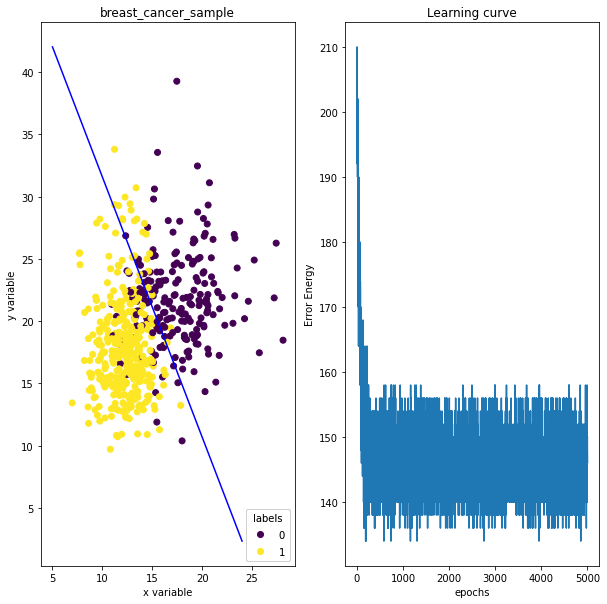

569
breast_cancer_sample sample: rate 0.5 y epochs 5000


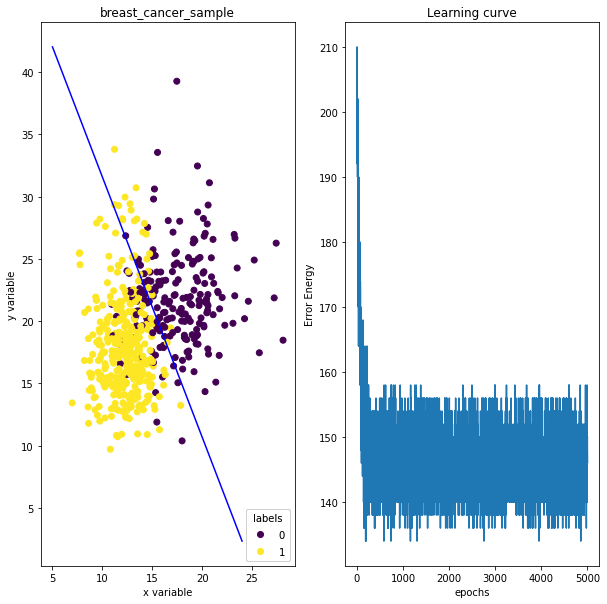

569
breast_cancer_sample sample: rate 1 y epochs 5000


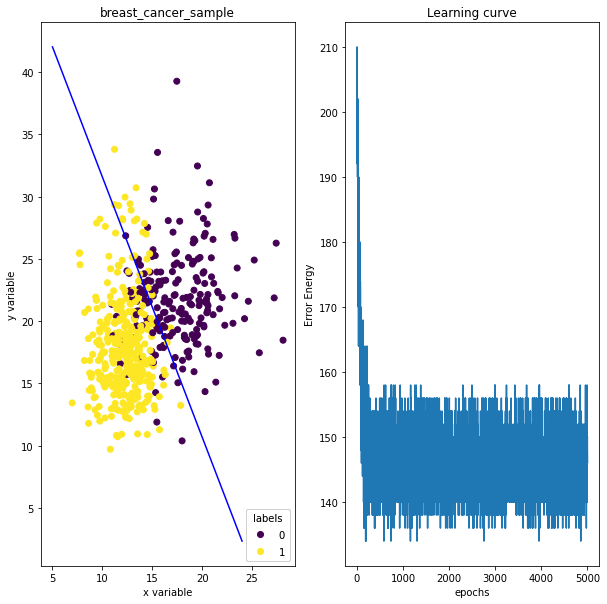

In [ ]:
list_epochs = [800,2000,5000]
learning_rate = [0.1, 0.5, 1]
for epochs in list_epochs:
  for rate in learning_rate:
    w, error_energy, _ = LinearRegressionTrain(breast_cancer_sample,breast_cancer_label_sample,epochs,rate)
    y_pred = LinearRegressionPredict(x_line,w)

    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,10))
    scatter = ax1.scatter(breast_cancer_sample[:,0],breast_cancer_sample[:,1],c = breast_cancer_label_sample)
    name = 'breast_cancer_sample sample: rate {} y epochs {}'.format(rate,epochs)
    print(name)
    legend1 = ax1.legend(*scatter.legend_elements(),
                    loc="lower right", title="labels")
    ax1.add_artist(legend1)
    ax1.plot(x_line,y_pred,'b')
    ax1.set_title('breast_cancer_sample')
    ax1.set_xlabel('x variable')
    ax1.set_ylabel('y variable')
    

    ax2.plot(np.arange(0,epochs,1),error_energy)
    ax2.set_title('Learning curve')
    ax2.set_xlabel('epochs')
    ax2.set_ylabel('Error Energy')
    plt.show()

4. Del ejercicio anterior se tiene que como las clases son linealmente no separable entonces el algoritmo no va a ponder aprener los parantros optinos pra hacer una buena clasificación. Sin embargo, la linea más aproximada a una "separación" de clases se da con el número de épocas igual a 5000 y el número de épocas igual a 800 con taza de aprendizaje de 1. Como tambien se evalua el tiempo computacional en este tipo de modelos entonces se utilia como mejor párametro 800 épocas y una tasa de aprendizaje de 1. Ahora se muestra el mismo ejercico de visualización que en los data sets anteriores

569


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


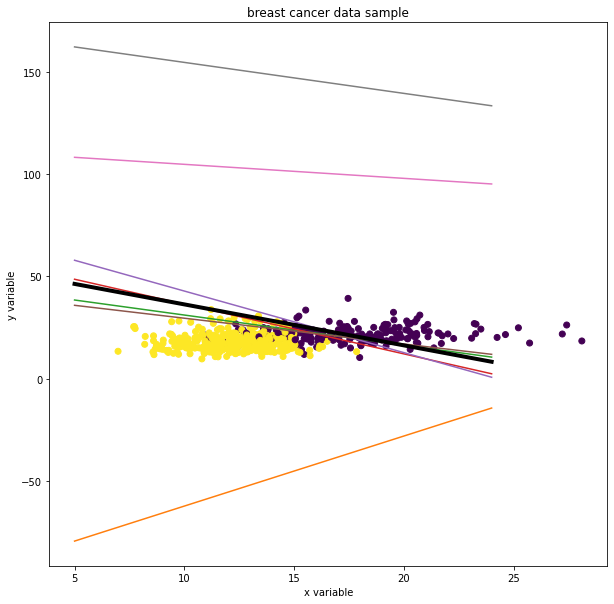

In [ ]:
epochs = 800 
rate = 1

w_final, error_energy, w_list = LinearRegressionTrain(breast_cancer_sample,breast_cancer_label_sample,epochs,rate)
curves = np.arange(0,850,100)

fig, ax1 = plt.subplots(figsize = (10,10))
scatter = ax1.scatter(breast_cancer_sample[:,0],breast_cancer_sample[:,1],c = breast_cancer_label_sample)
ax1.set_title('breast cancer data sample')
ax1.set_xlabel('x variable')
ax1.set_ylabel('y variable')


for w in curves:     
  y_pred = LinearRegressionPredict(x_line,w_list[w])
  if w == 800:
    ax1.plot(x_line,y_pred,'k',linewidth=4.0)
  else:
    ax1.plot(x_line,y_pred)


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


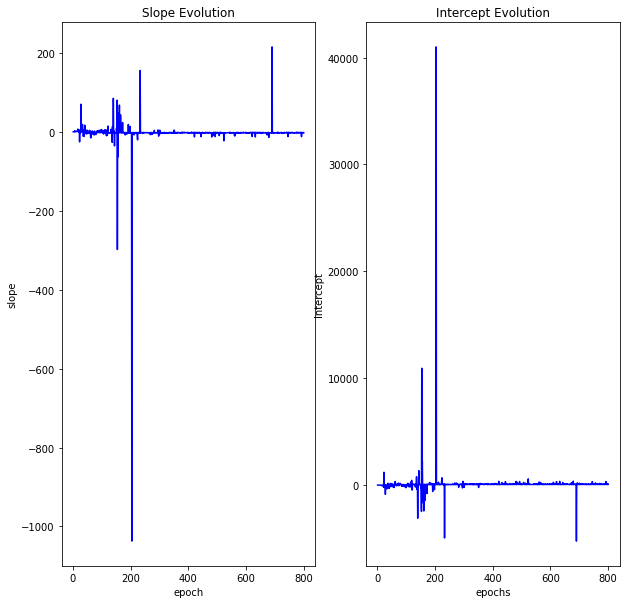

La linea es de la forma : y = -2.002x + (56.367)


In [ ]:
slope_evolution = []
intercept_evolution = []
  
for w in w_list:  
  slope = -w[0]/w[1]
  intercept = -w[2]/(w[1])
  slope_evolution.append(slope)
  intercept_evolution.append(intercept)


fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,10))
ax1.plot(slope_evolution,'b')
ax1.set_title('Slope Evolution')
ax1.set_xlabel('epoch')
ax1.set_ylabel('slope')


ax2.plot(intercept_evolution,'b')
ax2.set_title('Intercept Evolution')
ax2.set_xlabel('epochs')
ax2.set_ylabel('Intercept')
plt.show()

m = float(-w_final[0]/w_final[1])
b = float(-w_final[2]/(w_final[1]))
print('La linea es de la forma : y = ' + str(round(m,3)) + 'x' + ' + (' +str(round(b,3)) + ')')


5. Como ya se dijo antes el conjunto de datos es linealmente no separable por lo que este simpel algoritmo no puede encontrar la solución óptima , con lo que se requiere otro tipo de algortimoq que conteplen problemas de clasificación no lineal. Por otro lado tambien se peude ver que los parámetros tampoco convergen debido a la propiedad de No linealidad de losd atos. 